In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
from random import randint

In [37]:
mnist_dataset = tf.keras.datasets.fashion_mnist.load_data()
 
(x_train, y_train), (x_test, y_test) = mnist_dataset
 
print(x_train.shape)
print(y_train.shape)
 
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
# Scaling 
# To make all data in same range
x_train = x_train / 255.0

x_test = x_test / 255.0

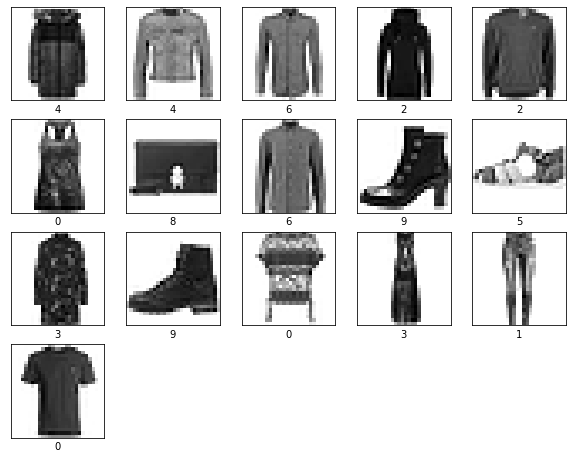

In [39]:
# Plotting 16 random images
plt.figure(figsize=(10,10))
for i in range(16):
    value = np.random.randint(60000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[value], cmap=plt.cm.binary)
    plt.xlabel(y_train[value])
plt.show()

In [40]:
# Function for selecting hyperparameters

# Learning rate is a tuning parameter that usually takes on low values
# so its interval is between small numbers.

def model_builder(hp):
  # Preparatory
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # .Int will select an integer that is the optimal
  # amount of units.
  # For the second layer we will give it 10 units and also
  # relu activation function.
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))
  # A too large learning rate will result in suboptimal weights
  # and a too small will take longer time to train.
  # We give it a list of options with relatively small values.
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
  # Adam produces solid results.
  # SparseCategoricalCrossentropy should be used when
  # having more than 2 class labels.
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [41]:
# Hyperband selects more efficient ways of performing hyperparameter optimization.
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=25,
)


Reloading Tuner from ./untitled_project/tuner0.json


In [42]:
# Searches best hyperparameters.
tuner.search(x_train, y_train, epochs=25, validation_split=0.2)

# Aquires best hyperparameters.
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [43]:
# When we have acquired the best hyperparameters we train the model for 25 epochs.
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)
# The variable best_epoch stores the amount of epochs that yields the highest result.
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7710 - loss: 0.6407 - val_accuracy: 0.8520 - val_loss: 0.4005
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8597 - loss: 0.3892 - val_accuracy: 0.8698 - val_loss: 0.3617
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8736 - loss: 0.3401 - val_accuracy: 0.8772 - val_loss: 0.3374
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8837 - loss: 0.3150 - val_accuracy: 0.8757 - val_loss: 0.3459
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8898 - loss: 0.2949 - val_accuracy: 0.8755 - val_loss: 0.3464
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8975 - loss: 0.2756 - val_accuracy: 0.8845 - val_loss: 0.3149
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9036 - loss: 0.2655 - val_accuracy: 0.8755 - val_loss: 0.3536
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9089 - loss: 0.2461 - 

In [44]:
# We train the model again but this time with the number of epochs that yielded the highest result.
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)


Epoch 1/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7805 - loss: 0.6337 - val_accuracy: 0.8503 - val_loss: 0.4158
Epoch 2/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8599 - loss: 0.3830 - val_accuracy: 0.8725 - val_loss: 0.3611
Epoch 3/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.3387 - val_accuracy: 0.8677 - val_loss: 0.3596
Epoch 4/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8853 - loss: 0.3123 - val_accuracy: 0.8744 - val_loss: 0.3528
Epoch 5/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8935 - loss: 0.2915 - val_accuracy: 0.8842 - val_loss: 0.3164
Epoch 6/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8983 - loss: 0.2761 - val_accuracy: 0.8888 - val_loss: 0.3083
Epoch 7/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9017 - loss: 0.2606 - val_accuracy: 0.8859 - val_loss: 0.3176
Epoch 8/21
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.2442 - 

In [45]:

eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8819 - loss: 0.3934
[test loss, test accuracy]: [0.38311538100242615, 0.885200023651123]
